In [1]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv('../data/car-price-prediction-x/train.csv')

# Basic inspection
df.head()


,model,year,motor_type,running,wheel,color,type,status,motor_volume,price
0,toyota,2022,petrol,3000 km,left,skyblue,sedan,excellent,2.0,24500
1,mercedes-benz,2014,petrol,132000 km,left,black,sedan,excellent,2.0,25500
2,kia,2018,petrol,95000 miles,left,other,sedan,excellent,2.0,11700
3,mercedes-benz,2002,petrol,137000 miles,left,golden,sedan,excellent,3.2,12000
4,mercedes-benz,2017,petrol,130000 km,left,black,sedan,good,2.0,26000


In [2]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         1642 non-null   object 
 1   year          1642 non-null   int64  
 2   motor_type    1642 non-null   object 
 3   running       1642 non-null   object 
 4   wheel         1642 non-null   object 
 5   color         1642 non-null   object 
 6   type          1642 non-null   object 
 7   status        1642 non-null   object 
 8   motor_volume  1642 non-null   float64
 9   price         1642 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 128.4+ KB


,year,motor_volume,price
count,1642.000000,1642.000000,1642.000000
mean,2014.805725,2.035018,15982.633374
std,6.587573,0.253069,7176.084647
min,1987.000000,0.200000,462.000000
25%,2013.000000,2.000000,12000.000000
50%,2017.000000,2.000000,15750.000000
75%,2019.000000,2.000000,18500.000000
max,2023.000000,4.000000,87000.000000


In [ ]:
# Check unique values for categoricals
print(df['model'].unique())
print(df['motor_type'].unique())
print(df['wheel'].unique())
print(df['color'].unique())
print(df['type'].unique())
print(df['status'].unique())


['toyota' 'mercedes-benz' 'kia' 'nissan' 'hyundai']
['petrol' 'gas' 'petrol and gas' 'diesel' 'hybrid']
['left']
['skyblue' 'black' 'other' 'golden' 'blue' 'gray' 'silver' 'white' 'clove'
 'orange' 'red' 'green' 'cherry' 'brown' 'beige' 'purple' 'pink']
['sedan' 'suv' 'Universal' 'Coupe' 'pickup' 'hatchback'
 'minivan / minibus']
['excellent' 'good' 'crashed' 'normal' 'new']


In [4]:
# Inspect running column
print(df['running'].unique()[:20])  # See first 20 unique patterns

['3000  km' '132000  km' '95000  miles' '137000  miles' '130000  km'
 '286293  km' '49000  miles' '70000  miles' '85000  km' '58000  miles'
 '50000  miles' '135800  km' '191000  km' '220000  km' '38100  miles'
 '102000  miles' '126000  km' '98000  km' '60000  miles' '99000  km']


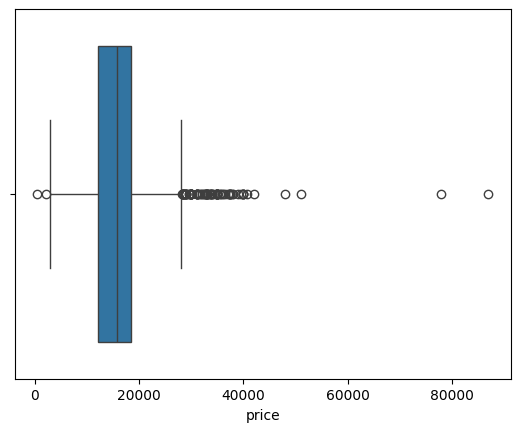

In [6]:
# price outliers
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['price'])
plt.show()


In [7]:
df['price'].describe()

count     1642.000000
mean     15982.633374
std       7176.084647
min        462.000000
25%      12000.000000
50%      15750.000000
75%      18500.000000
max      87000.000000
Name: price, dtype: float64

In [8]:
# Make a clean numeric column

import re

# Function to clean and convert running column
def convert_running(value):
    value = value.lower().strip()
    match = re.match(r'(\d+\.?\d*)\s*(km|miles)', value)
    if match:
        num, unit = match.groups()
        num = float(num)
        if unit == 'miles':
            num *= 1.60934  # convert miles to km
        return num
    return None  # if no match

df['running_km'] = df['running'].apply(convert_running)

# Check
df[['running', 'running_km']].head(10)


,running,running_km
0,3000 km,3000.00
1,132000 km,132000.00
2,95000 miles,152887.30
3,137000 miles,220479.58
4,130000 km,130000.00
5,286293 km,286293.00
6,49000 miles,78857.66
7,70000 miles,112653.80
8,85000 km,85000.00
9,58000 miles,93341.72


In [ ]:
# Validate
print(df['running_km'].describe())

count    1.642000e+03
mean     1.192104e+05
std      9.676625e+04
min      1.000000e+01
25%      5.632690e+04
50%      9.878604e+04
75%      1.609139e+05
max      1.251708e+06
Name: running_km, dtype: float64


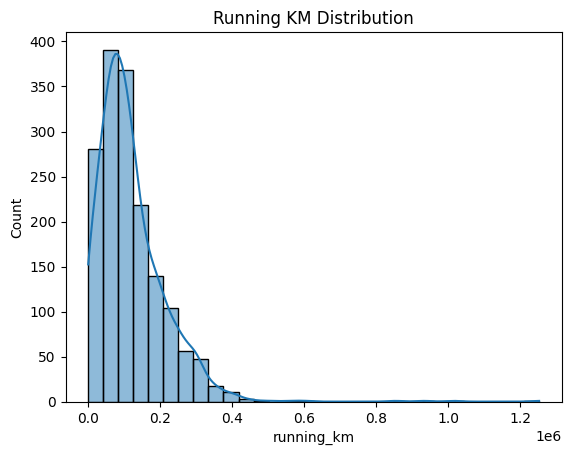

In [10]:
# distribution
sns.histplot(df['running_km'], bins=30, kde=True)
plt.title("Running KM Distribution")
plt.show()


In [ ]:
# Spot & Handle Outliers
Q1 = df['running_km'].quantile(0.25)
Q3 = df['running_km'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

# How many outliers?
outliers = df[(df['running_km'] < lower_bound) | (df['running_km'] > upper_bound)]
print(f"Outliers count: {outliers.shape[0]}")


Lower bound: -100553.57487500002
Upper bound: 317794.358125
Outliers count: 46


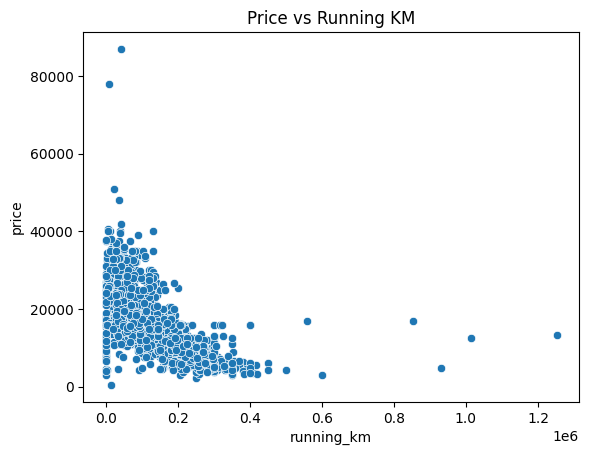

In [14]:
# Correlation & Plots
sns.scatterplot(x='running_km', y='price', data=df)
plt.title("Price vs Running KM")
plt.show()


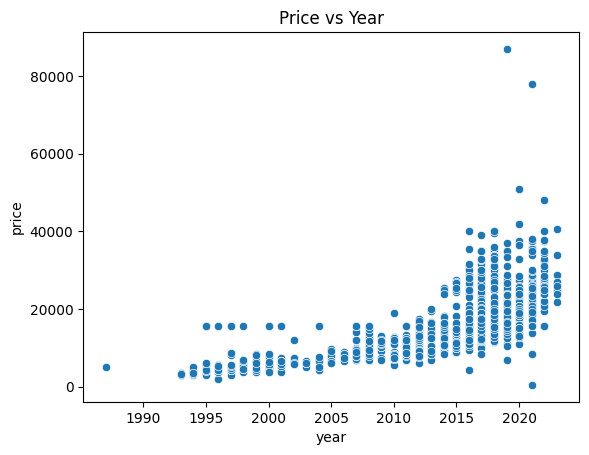

In [15]:
sns.scatterplot(x='year', y='price', data=df)
plt.title("Price vs Year")
plt.show()


                 price      year  running_km  motor_volume
price         1.000000  0.638699   -0.513134      0.000885
year          0.638699  1.000000   -0.662845     -0.067525
running_km   -0.513134 -0.662845    1.000000      0.103905
motor_volume  0.000885 -0.067525    0.103905      1.000000


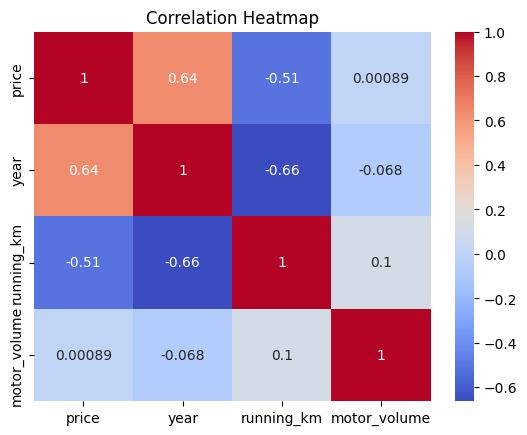

In [ ]:
# correlation matrix
corr = df[['price', 'year', 'running_km', 'motor_volume']].corr()
print(corr)

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
### ✅ EDA Summary
# - The dataset has 1,642 rows with no missing values.
# - The `running` column was cleaned and converted to `running_km`.
# - Outliers above 318,000 km were capped.
# - `year` and `running_km` show strong correlations with `price`.
# - `motor_volume` appears to have low correlation.
# - Next step: Preprocess categorical features and prepare for modeling.
